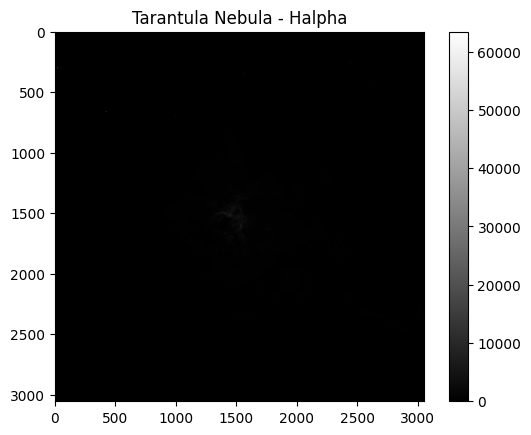

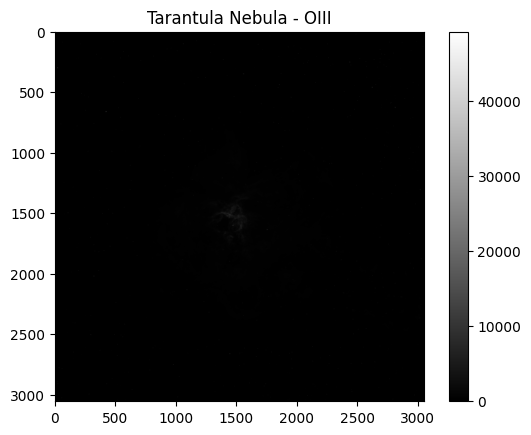

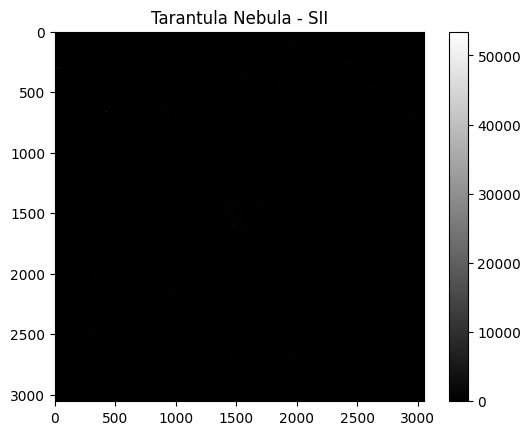

In [4]:
from astropy.io import fits
import matplotlib.pyplot as plt

data = fits.getdata('images/Tarantula_Nebula-halpha.fit')
data2 = fits.getdata('images/Tarantula_Nebula-oiii.fit')
data3 = fits.getdata('images/Tarantula_Nebula-sii.fit')


plt.figure()  
image1 = plt.imshow(data, cmap='gray')
plt.colorbar(image1)
plt.title("Tarantula Nebula - Halpha")
plt.show()


plt.figure()  
image2 = plt.imshow(data2, cmap='gray')
plt.colorbar(image2)
plt.title("Tarantula Nebula - OIII")
plt.show()


plt.figure()  
image3 = plt.imshow(data3, cmap='gray')
plt.colorbar(image3)
plt.title("Tarantula Nebula - SII")
plt.show()
